# FBA

In [3]:
import os
from os.path import join
import pandas
pandas.options.display.max_rows = 100

import cobra

data_dir = "/Users/davidbotero/Dropbox (UCSD SBRG)/Xam_Multistrain_Recon/Metabolic_model/BiGG_Model/"
xam_model = cobra.io.read_sbml_model(join(data_dir, "Xam_BiGG_minmal_media.xml"))

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

In [12]:
xam_model.objective ="Biomass"
xam_model.objective

In [13]:
xam_model.reactions.get_by_id("Biomass").reaction

'0.003096466851925 10fthf_c + 0.003096466851925 2dmmq8_c + 0.003096466851925 5mthf_c + 0.003096466851925 ACP_c + 0.010648042134188 MNXM5124_c + 0.010648042134188 MNXM5129_c + 0.003096466851925 MNXM57_c + 0.010648042134188 MNXM6175_c + 0.010648042134188 MNXM6297_c + 0.010648042134188 MNXM6440_c + 0.010648042134188 MNXM7294_c + 0.010648042134188 MNXM7305_c + 0.025010597710894 MNXM7630_c + 0.003096466851925 adocbl_c + 0.427934380173264 ala__L_c + 0.003096466851925 amet_c + 0.246696822701341 arg__L_c + 0.200830806928348 asn__L_c + 0.200830806928348 asp__L_c + 40.1101757365074 atp_c + 0.003096466851925 ca2_c + 0.003096466851925 cl_c + 0.003096466851925 coa_c + 0.003096466851925 cobalt2_c + 0.025010597710894 colipa_c + 0.084103615654486 ctp_c + 0.003096466851925 cu2_c + 0.076146492205648 cys__L_c + 0.016020671834625 datp_c + 0.016020671834625 dctp_c + 0.016020671834625 dgtp_c + dna_c + 0.025010597710894 dtpcudcpp_c + 0.016020671834625 dttp_c + 0.003096466851925 fad_c + 0.003096466851925 fe2_

In [14]:
FBA_sol = xam_model.optimize()
print (FBA_sol)

<Solution 1.735 at 0x10706e048>


In [18]:
FBA_sol.objective_value

1.7348947630524318

In [19]:
FBA_sol.status

'optimal'

In [20]:
FBA_sol.fluxes

10FTHFGLULL              0.000000
2DHPFALDL                0.000000
2HBO                     0.000000
2OH3K5MPPISO             0.000000
34DHOXPEGOX              0.000000
34HPPOR                  0.000000
3HAO                     0.000000
3HBCOAHL                 0.000000
3HLYTCL                  0.000000
3OAR100                  0.000000
3OAR120                  0.000000
3OAR40_1                 0.000000
3OAR60                   0.000000
3OAR80                   0.000000
3OAS80                   0.000000
4ABUTD                   0.000000
4CMLCL_kt                0.000000
4HTHRS                   0.000000
56DH5FLURAAMH            0.000000
5FLURAPRT                0.000000
5HLTDL                   0.000000
5HXKYNDCL                0.000000
A5PISO                  -0.130172
AACOAR_syn               0.000000
AACOAT                   0.000000
AASPh                    0.000000
ABUTD                    0.000000
ACACT1                  -0.147786
ACACT10m                 0.000000
ACACT2        

In [22]:
FBA_sol.shadow_prices

h_c               5.142554e-18
10fthfglu__L_c    0.000000e+00
adp_c            -2.168618e-01
pi_c              4.264062e-18
10fthf_c         -4.915535e-01
atp_c            -2.168618e-01
glu__L_c         -1.301171e-01
3mob_c           -1.590320e-01
fald_c           -2.891491e-02
2dhp_c           -1.879469e-01
nadh_c           -2.313193e-01
2obut_c          -1.156597e-01
2hb_c            -1.301171e-01
nad_c            -2.168618e-01
h2o_c             1.387779e-17
2h3kmtp_c        -3.614364e-01
12dmpo_c         -3.614364e-01
34dhmald_c        1.445746e-02
34dhoxpeg_c       0.000000e+00
co2_c            -0.000000e+00
hgentis_c        -2.307798e-16
2h34hppr_c       -2.602342e-01
o2_c              2.359224e-16
cmusa_c           1.902034e-17
3hanthrn_c       -2.169021e-16
coa_c            -6.361281e-01
3hmp_c           -1.445746e-01
3hibutcoa_c      -7.807026e-01
dopa_c            0.000000e+00
34dhphe_c         0.000000e+00
3odecACP_c        1.445746e-02
nadph_c          -2.313193e-01
nadp_c  

In [7]:
FBA_results = xam_model.solution.x_dict
fba_df = pandas.DataFrame.from_dict(FBA_results, orient='index').T.round(5)
fba_df_t = pandas.DataFrame.transpose(fba_df)
fba_df_t = fba_df_t.rename_axis("Reaction")
fba_df_t = fba_df_t.rename_axis({0: "Flux"}, axis="columns")
print(fba_df_t)

                     Flux
Reaction                 
CSND              0.00000
MNXR8691         -0.00000
NTD10            70.32855
NTD11             0.00000
GLYBabc           0.00000
XTSNH           -70.32855
DDPA             -2.84485
P5CD              0.00000
P5CR            -53.48435
GLUTRR           -0.49543
GLUTRS           -0.49543
MG2t              0.03096
KARI_23dhmp      41.22050
ACALDt         -182.15748
CO2t            -21.38295
MNXR3469          0.00000
KARI_23dhmb   -1000.00000
GUDBUTNAH         0.00000
PANTS            -0.06193
E4PD              0.00000
PLIPA2A180pp      0.00000
MNXR87148         1.00042
TDPGDH            0.25011
CYTDt2           10.00000
MNXR8073          0.00000
CYOO2pp           0.00000
GAPDH_nadp_hi     0.00000
rxn05379_c0      -0.85184
MNXR2826          0.00000
ADSL2r           -1.60761
UAGPT3           -0.25011
UAGPT2            0.00000
GART              0.00000
EX_hxan_e        18.49076
DHCIND            0.00000
CDPGLC46DH        0.00000
MNXR63968   

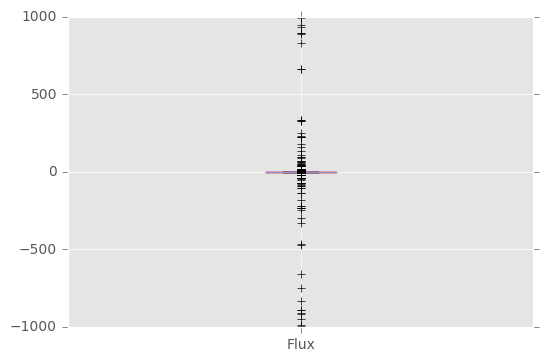

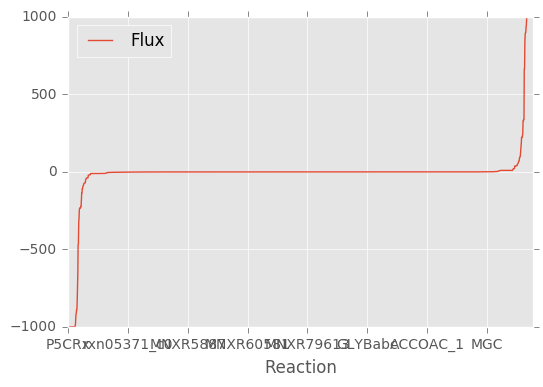

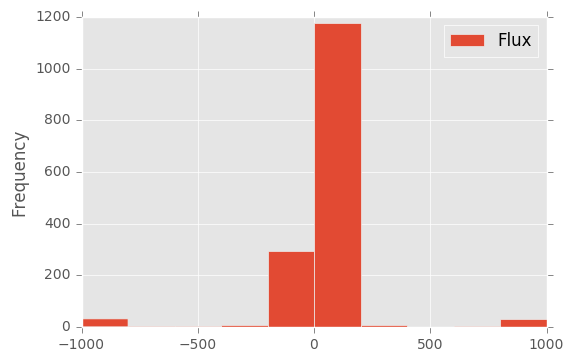

In [8]:
fba_df_sort = fba_df_t.sort_values(by="Flux")
plt.figure()
fba_df_sort.plot.box()
#plt.savefig('FBA_Xam_box.svg', format='svg', dpi=1200)
#plt.savefig('FBA_Xam_box.png', format='png', dpi=1200)
fba_df_sort.plot.line()
#plt.savefig('FBA_Xam.svg', format='svg', dpi=1200)
#plt.savefig('FBA_Xam.png', format='png', dpi=1200)
fba_df_sort.plot.hist()
#plt.savefig('FBA_Xam_hist.svg', format='svg', dpi=1200)
#plt.savefig('FBA_Xam_hist.png', format='png', dpi=1200)

###  Overall redox balance

In [31]:
xam_model.metabolites.get_by_id("nadh_c")

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 16))



TypeError: object of type 'NoneType' has no len()

<Metabolite nadh_c at 0x11f52e240>

In [10]:
xam_model.metabolites.nadh_c.summary()

TypeError: object of type 'NoneType' has no len()

In [32]:
xam_model.metabolites.nadh_c.name

In [34]:
for i in [i.id for i in xam_model.metabolites if 'nad_c' in i.name]:
        print('%s: %s' % (xam_model.metabolites.get_by_id(i), xam_model.metabolites.get_by_id(i).name))

TypeError: argument of type 'NoneType' is not iterable

### Main energy production and consumption reactions

In [80]:
xam_model.metabolites.atp_c.summary(fva_df_sort=0.90)

TypeError: object of type 'NoneType' has no len()

In [81]:
xam_model.metabolites.atp_c.name

### Objective Function

In [11]:
xam_model.objective

{<Reaction Biomass at 0x11a93d610>: 1}

### FVA 100%

In [12]:
fva_results = cobra.flux_analysis.flux_variability_analysis(xam_model, xam_model.reactions)
fva_df = pandas.DataFrame.from_dict(fva_results).T.round(5)
print(fva_df)

                  maximum     minimum
10FTHFGLULL       0.00000     0.00000
2DHPFALDL         0.00000     0.00000
2HBO              0.00000     0.00000
2OH3K5MPPISO      0.00000     0.00000
34DHOXPEGOX       0.00000     0.00000
34HPPOR           0.00000     0.00000
3HAO              0.00000     0.00000
3HBCOAHL          0.00000   -39.65939
3HLYTCL           0.00000     0.00000
3OAR100           0.00000     0.00000
3OAR120           0.00000     0.00000
3OAR40_1          0.00000     0.00000
3OAR60            0.00000     0.00000
3OAR80            0.00000     0.00000
3OAS80            0.00000     0.00000
4ABUTD            0.00000     0.00000
4CMLCL_kt         0.00000     0.00000
4HTHRS            0.00000     0.00000
56DH5FLURAAMH     0.00000     0.00000
5FLURAPRT         0.00000     0.00000
5HLTDL            0.00000     0.00000
5HXKYNDCL         0.00000     0.00000
A5PISO           -0.75032    -0.75032
AACOAR_syn        0.00000     0.00000
AACOAT            0.00000     0.00000
AASPh       

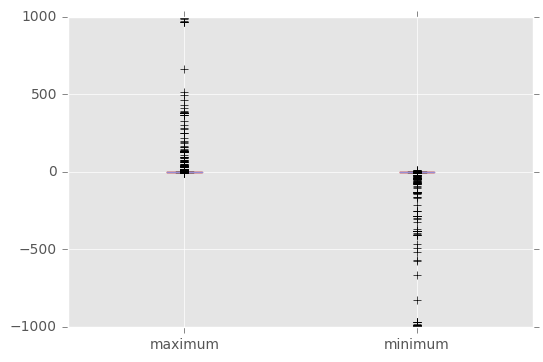

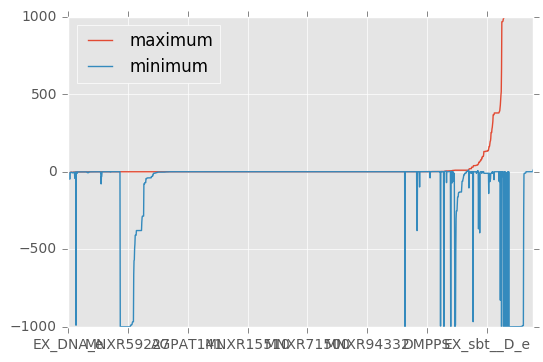

In [14]:
fva_df_sort = fva_df.sort_values(by=['maximum', 'minimum'])
plt.figure(dpi=400)
fva_df_sort.plot.box()
#plt.savefig('FVA_Xam_plot.svg', format='svg', dpi=1200)
fva_df_sort.plot.line()
#plt.savefig('FVA_Xam.svg', format='svg', dpi=1200)

In [ ]:
fva_df_sort.plot.bar()
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=True)
#plt.savefig('FVA_Xam_bar.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_bar.png', format='png', dpi=1200)

### FVA 90%

In [86]:
fva_results = cobra.flux_analysis.flux_variability_analysis(xam_model, xam_model.reactions, fraction_of_optimum=0.9)
fva_df = pandas.DataFrame.from_dict(fva_results).T.round(5)
print(fva_df)

                  maximum     minimum
10FTHFGLULL       0.00000     0.00000
2DHPFALDL         0.00000     0.00000
2HBO              0.00000     0.00000
2OH3K5MPPISO      0.00000     0.00000
34DHOXPEGOX       0.00000     0.00000
3HAO              0.00000     0.00000
3HBCOAHL          0.00000  -880.79611
3HLYTCL           0.00000     0.00000
3OAR100           0.00000     0.00000
3OAR120           0.00000     0.00000
3OAR40_1          0.00000     0.00000
3OAR60            0.00000     0.00000
3OAR80            0.00000     0.00000
3OAS80            0.00000     0.00000
4ABUTD            0.00000     0.00000
4CMLCL_kt         0.00000     0.00000
4HTHRS            0.00000     0.00000
56DH5FLURAAMH     0.00000     0.00000
5FLURAPRT         0.00000     0.00000
5HLTDL            0.00000     0.00000
5HXKYNDCL         0.00000     0.00000
A5PISO          -12.18847   -13.54274
AACOAR_syn     1000.00000 -1000.00000
AACOAT            0.00000 -1000.00000
AASPh             0.00000   -38.70629
ABUTD       

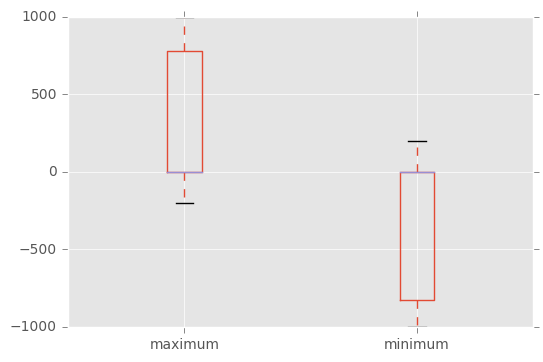

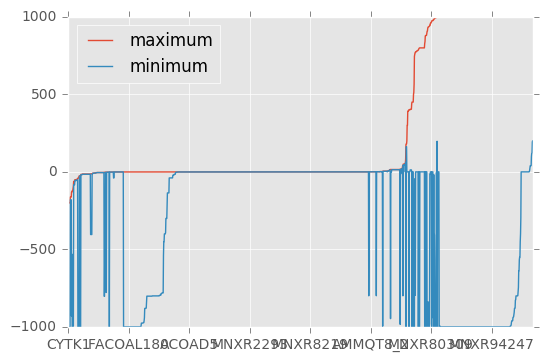

In [87]:
fva_df_sort = fva_df.sort_values(by=['maximum', 'minimum'])
plt.figure(dpi=400)
fva_df_sort.plot.box()
#plt.savefig('FVA_Xam_plot_90.svg', format='svg', dpi=1200)
fva_df_sort.plot.line()
#plt.savefig('FVA_Xam_line_90.png', format='png', dpi=1200)

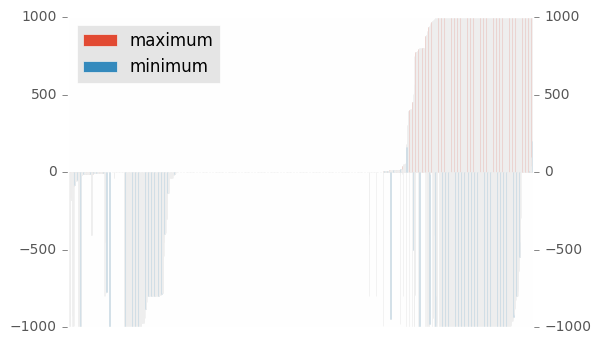

In [88]:
fva_df_sort.plot.bar()
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=True)
#plt.savefig('FVA_Xam_bar_90.svg', format='svg', dpi=400)
#plt.savefig('FVA_Xam_bar_90.png', format='png', dpi=400)

### FVA 50%

In [89]:
fva_results = cobra.flux_analysis.flux_variability_analysis(xam_model, xam_model.reactions, fraction_of_optimum=0.5)
fva_df = pandas.DataFrame.from_dict(fva_results).T.round(5)
fva_df.index.name = 'reaction'
print(fva_df)

                  maximum     minimum
reaction                             
10FTHFGLULL       0.00000     0.00000
2DHPFALDL         0.00000     0.00000
2HBO              0.00000     0.00000
2OH3K5MPPISO      0.00000     0.00000
34DHOXPEGOX       0.00000     0.00000
3HAO              0.00000     0.00000
3HBCOAHL          0.00000  -933.77562
3HLYTCL           0.00000     0.00000
3OAR100           0.00000     0.00000
3OAR120           0.00000     0.00000
3OAR40_1          0.00000     0.00000
3OAR60            0.00000     0.00000
3OAR80            0.00000     0.00000
3OAS80            0.00000     0.00000
4ABUTD            0.00000     0.00000
4CMLCL_kt         0.00000     0.00000
4HTHRS            0.00000     0.00000
56DH5FLURAAMH     0.00000     0.00000
5FLURAPRT         0.00000     0.00000
5HLTDL            0.00000     0.00000
5HXKYNDCL         0.00000     0.00000
A5PISO           -6.77137   -13.54274
AACOAR_syn     1000.00000 -1000.00000
AACOAT            0.00000 -1000.00000
AASPh       

In [90]:
fva_df_sort = fva_df.sort_values(by=['maximum', 'minimum'])
print(fva_df_sort)

                   maximum     minimum
reaction                              
EX_rxn13782_c0   -90.24670  -180.49341
EX_rxn13783_c0   -90.24670  -180.49341
EX_rxn13784_c0   -90.24670  -180.49341
MCOATA           -89.99414  -179.98829
EX_pi_e          -72.44057 -1000.00000
PIabc            -72.44057 -1000.00000
APLh             -66.22438 -1000.00000
IMDHT            -33.87761   -82.97096
IPMD             -33.87761   -82.97096
IPPS             -33.87761   -82.97096
OMCDC            -33.87761   -82.97096
EX_lys__L_e      -28.01696   -56.03393
LYSt2m           -28.01696   -56.03393
CDPMEK           -27.62282   -55.24565
CMS              -27.62282   -55.24565
DXPRIi           -27.62282   -55.24565
DXPS             -27.62282   -55.24565
MCS              -27.62282   -55.24565
DDPA             -25.67388   -51.34776
DHQTi            -25.67388   -51.34776
SHKK             -25.67388   -51.34776
EX_arg__L_e      -22.26357 -1000.00000
ACAS_2ahbut      -21.82152 -1000.00000
MNXR79704        -21.8215

In [91]:
import numpy

fva_df_sort_equal = fva_df_sort[(fva_df_sort["maximum"] == 1000) & (fva_df_sort["minimum"] == -1000)]
print(fva_df_sort_equal)

                maximum  minimum
reaction                        
AACOAR_syn       1000.0  -1000.0
ACCOAC           1000.0  -1000.0
ACONT            1000.0  -1000.0
ACONTa           1000.0  -1000.0
ACONTb           1000.0  -1000.0
ADK1             1000.0  -1000.0
AGTi             1000.0  -1000.0
AKGDH            1000.0  -1000.0
ALAR             1000.0  -1000.0
ATGDm            1000.0  -1000.0
ATPS4m           1000.0  -1000.0
BCTA_val_h       1000.0  -1000.0
CHOLD            1000.0  -1000.0
CITt2r           1000.0  -1000.0
CO2t             1000.0  -1000.0
COALDDH          1000.0  -1000.0
CTPS1            1000.0  -1000.0
DAAD             1000.0  -1000.0
DALAt2pp         1000.0  -1000.0
DDGLCNt2r        1000.0  -1000.0
DDGLK            1000.0  -1000.0
EDA              1000.0  -1000.0
ENO              1000.0  -1000.0
ETHAt2pp         1000.0  -1000.0
EX_2ddglcn_e     1000.0  -1000.0
EX_MNXR94191_e   1000.0  -1000.0
EX_ala__D_e      1000.0  -1000.0
EX_cit_e         1000.0  -1000.0
EX_co2_e  

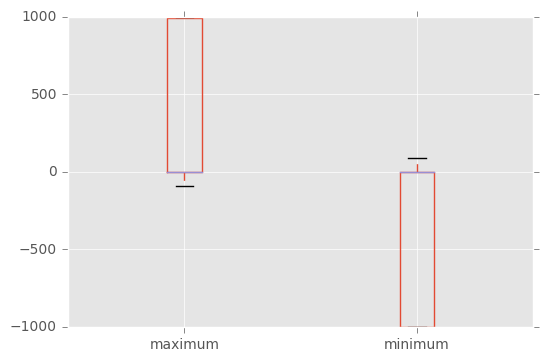

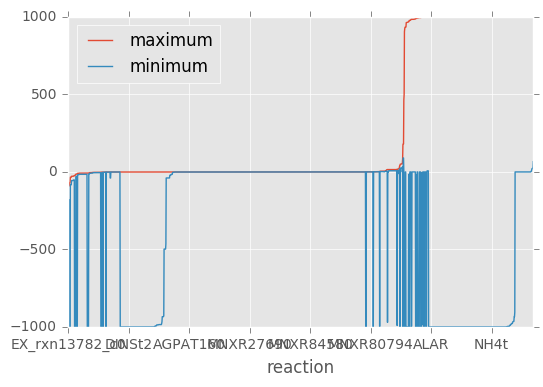

In [92]:
plt.figure(dpi=400)
fva_df_sort.plot.box()
#plt.savefig('FVA_Xam_box_50.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_box_50.png', format='png', dpi=1200)
fva_df_sort.plot.line()
#plt.savefig('FVA_Xam_plot_50.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_plot_50.png', format='png', dpi=1200)

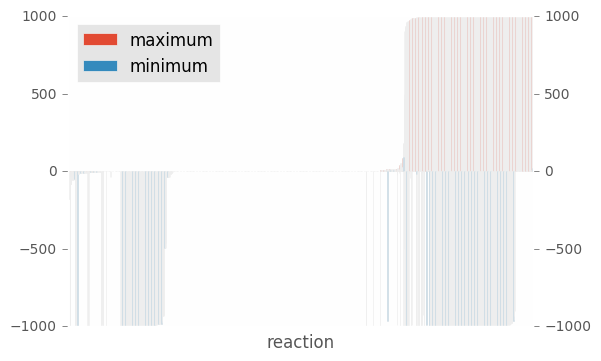

In [93]:
fva_df_sort.plot.bar()
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=True)
#plt.savefig('FVA_Xam_bar_50.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_bar_50.png', format='png', dpi=1200)

In [94]:
import numpy

fva_df_sort_equal = fva_df_sort[(fva_df_sort["maximum"] > 0) & (fva_df_sort["minimum"] < 0)]
print(fva_df_sort_equal)
print(len(fva_df_sort_equal))

                 maximum     minimum
reaction                            
AMPTASECG        0.55889  -999.72055
MG2t             0.55889  -999.72055
Kt1              1.11778  -999.44111
THMDt2           2.89163  -997.71585
HACD9           15.37521  -970.49088
MNXR14768       15.40577   -23.59137
MNXR87148       18.05699  -990.97150
MNXR3495        25.82364   -13.17235
SO4t2           39.45118  -999.72055
GCC2cm         176.09180 -1000.00000
FERO           500.13972  -500.41917
PDHam2hi       904.26649 -1000.00000
CYTK1          924.38157 -1000.00000
KARI_23dhmb    933.77562 -1000.00000
UMPK           935.20983  -989.17174
ADNK1          963.32094 -1000.00000
ASPATh         963.75136 -1000.00000
EX_ASPt5n_e    963.75136 -1000.00000
EX_adn_e       964.43873 -1000.00000
TKT2           965.29763 -1000.00000
BCTA_glu_h     966.12239 -1000.00000
EX_cytd_e      967.42433 -1000.00000
ITCY           967.42433 -1000.00000
ACACT10m       970.49088   -15.37521
ECOAH9ir       970.49088   -15.37521
I

In [109]:
xam_model.metabolites.nadh_c.summary(fva=0.95)

TypeError: object of type 'NoneType' has no len()

### pFBA

In [103]:
pFBA_sol = cobra.flux_analysis.optimize_minimal_flux(xam_model)

In [104]:
abs(FBA_sol.f - pFBA_sol.f)

5.684341886080802e-14

In [107]:
xam_model.reactions.Biomass.name